# Linearização

## Exemplo 5.2

Vamos inserir os dados e plotar o gráfico de $V_R \times t$.

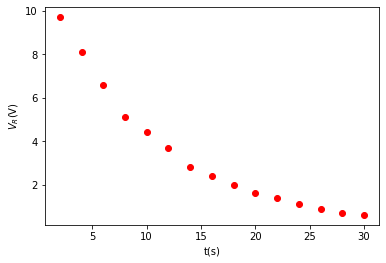

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Os dados experimentais
texp = np.arange(2,31,2)
vexp = np.array([9.7, 8.1, 6.6, 5.1, 4.4, 3.7, 2.8, 2.4, 2.0, 1.6, 1.4, 1.1, 0.85, 0.69, 0.6])

#Plotando o gráfico
x = texp
y = vexp

plt.plot(x,y,'ro')
plt.xlabel("t(s)")
plt.ylabel("$V_R$(V)")
plt.show()

Vamos fazer ajuste linear desses dados. 

Antes de tudo, vou carregar a função ```RegressaoLinear``` que está definida num outro notebook chamado ```RegressaoLinear-def```. Ou seja está no arquivo chamado [RegressaoLinear-def.ipynb](./RegressaoLinear-def.ipynb). A maneira de rodar aquele notebook aqui mesmo é através do comando especial %run. Veja:

In [61]:
#Rodando o arquivo de notebook que contém a função RegressaoLinear
%run ./RegressaoLinear-def.ipynb

Agora já podemos usar a função RegressaoLinear:

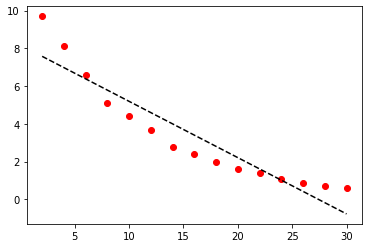

In [62]:
a0,a1 = RegressaoLinear(texp,vexp)

plt.plot(x,y,'ro')
plt.plot(x,(a0+a1*x),'k--')
plt.show()

Não deu certo, né? Afinal, os pontos experimentais são de um decaimento exponencial.

Mas será mesmo? Vamos testar. Vamos fazer os gráficos que foram sugeridos para cada tipo de função linearizável que vimos.

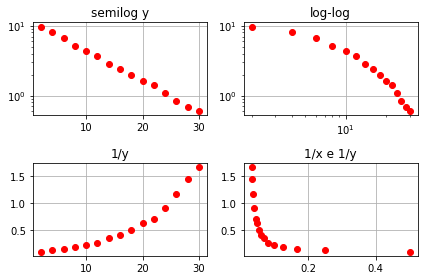

In [63]:
x = texp
y = vexp

# Criando a figura e os 4 subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# log y 
ax1.semilogy(x,y,'ro')
ax1.set(title='semilog y')
ax1.grid()

# log-log
ax2.loglog(x,y,'ro')
ax2.set(title='log-log')
ax2.grid()

# 
ax3.plot(x,1/y,'ro')
ax3.set(title='1/y')
ax3.grid()

# 1/x 1/y
ax4.plot(1/x,1/y,'ro')
ax4.set(title='1/x e 1/y')
ax4.grid()

fig.tight_layout()
plt.show()


O gráfico monolog-y mostra que a dependência é mesmo exponencial, como é previsto teoricamente $$V_R = V e^{(-t/(RC))}$$.

Agora vamos partir para a linearização:

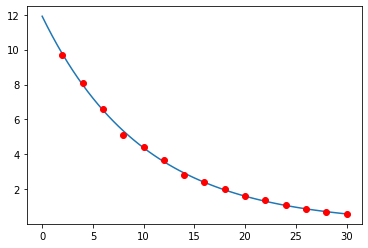

In [64]:
vexpLOG = np.log(vexp)
# AJuste da função linearizada ln(VR):
a0,a1 = RegressaoLinear(texp, vexpLOG)
# Conversão dos parâmetros a0 e a1 para os parâmetros da função original
R = 5E6
b = np.exp(a0)
C = -1/(R*a1)
# Valores calculados pela função de ajuste:
t = np.arange(0,30.1,0.5)
v = b*np.exp(a1*t) 
#Plotando pontos e ajuste
plt.plot(t,v,texp,vexp,'or')
plt.show()

In [ ]:
X = np.random.random(50)
X.sort()
X
#plt.plot(X)
Xr = np.random.randn(50)
Xd = X*(1+0.05*Xr)
#plt.plot(X,Xd,'ro')

def c(x):
    c = 23*np.exp(-12*x)
    d = 11*x**(-3.1)
    return d
x = 100*X
y = c(Xd)
print(len(x), len(y))
plt.plot(x,np.log(y),'ro')

#import numpy as np
np.savetxt('test2.txt', np.column_stack((x,y)))
x

In [2]:
import watermark
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p wget,pandas,numpy,matplotlib

# date
print (" ")
%watermark -u -n -t -z 

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.13.0

wget      : not installed
pandas    : 0.25.3
numpy     : 1.17.4
matplotlib: 3.1.2

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.4.0-77-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Wed Jul 07 2021 10:54:42-03

